In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
print(pd.__version__)
print(tf.__version__)

1.0.5
2.3.0


In [3]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="./datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0
# Scaling median_house_value puts the value of each house in units of thousands.
# Scaling will keep loss values and learning rates in a friendlier range.
# Although scaling a label is usually not essential, scaling features in a multi-feature model usually is essential.

# print the shape of the dataset
print(training_df.shape)
# Print the first rows of the pandas DataFrame.
training_df.head()

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [4]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [5]:
# Find the correlation among all the variables
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [6]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential. 
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))

    # Compile the model topography into code that 
    # TensorFlow can efficiently execute.
    # Configure training to minimize the model's mean squared error. 
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate),
                  loss = "mean_squared_error",
                  metrics = [tf.keras.metrics.RootMeanSquaredError()])

    return model
## END
print("Defined create_model")

Defined create_model


In [7]:
def train_model(model, df, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the model the feature and the label.
    # The model will train for the specified number of epochs. 
    history = model.fit(x = df[feature],
                      y = df[label],
                      batch_size = batch_size,
                      epochs = epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the error for each epoch.
    hist = pd.DataFrame(history.history)

    # To track the progression of training, we're going to take a snapshot of the model's root mean squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse
## END
print("Defined train_model")

Defined train_model


In [8]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against 200 random training examples."""

    # Label the axes.
    plt.xlabel(feature)
    plt.ylabel(label)

    # Create a scatter plot from 200 random points of the dataset.
    random_examples = training_df.sample(n = 200)
    plt.scatter(random_examples[feature], random_examples[label])

    # Create a red line representing the model.
    # The red line starts at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c = 'r')

    # Render the scatter plot and the red line.
    plt.show()
## END
print("Defined plot_the_model")

Defined plot_the_model


In [9]:
def plot_the_loss_curve(epochs, rmse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()
## END
print("Defined plot_the_loss_curve")

Defined plot_the_loss_curve


Epoch 1/30
85/85 [==============================] - 0s 657us/step - loss: 63901.5078 - root_mean_squared_error: 252.7875
Epoch 2/30
85/85 [==============================] - 0s 692us/step - loss: 55388.8359 - root_mean_squared_error: 235.3483
Epoch 3/30
85/85 [==============================] - 0s 763us/step - loss: 55261.0781 - root_mean_squared_error: 235.0768
Epoch 4/30
85/85 [==============================] - 0s 2ms/step - loss: 56355.6211 - root_mean_squared_error: 237.3934
Epoch 5/30
85/85 [==============================] - 0s 974us/step - loss: 52072.7422 - root_mean_squared_error: 228.1945
Epoch 6/30
85/85 [==============================] - 0s 774us/step - loss: 52516.8633 - root_mean_squared_error: 229.1656
Epoch 7/30
85/85 [==============================] - 0s 1ms/step - loss: 54574.8398 - root_mean_squared_error: 233.6126
Epoch 8/30
85/85 [==============================] - 0s 997us/step - loss: 52016.2383 - root_mean_squared_error: 228.0707
Epoch 9/30
85/85 [==================

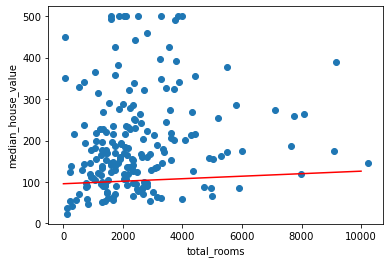

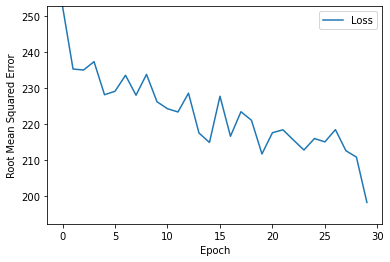

In [10]:
# The following variables are the hyperparameters.
learning_rate = 0.1
epochs = 30
batch_size = 200

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model,
                                         training_df, 
                                         my_feature,
                                         my_label,
                                         epochs,
                                         batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [11]:
def predict_house_values(n, feature, label):
    """Predict house values based on a feature."""

    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i], training_df[label][10000 + i], predicted_values[i][0]))
## END

In [12]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             102
 3400     92             106
 3677     69             107
 2202     62             102
 2403     80             103
 5652    295             113
 3318    500             106
 2552    342             103
 1364    118             100
 3468    128             106


Epoch 1/30
85/85 [==============================] - 0s 727us/step - loss: 86665.2188 - root_mean_squared_error: 294.3896
Epoch 2/30
85/85 [==============================] - 0s 821us/step - loss: 37879.5195 - root_mean_squared_error: 194.6266
Epoch 3/30
85/85 [==============================] - 0s 915us/step - loss: 37771.1094 - root_mean_squared_error: 194.3479
Epoch 4/30
85/85 [==============================] - 0s 1ms/step - loss: 38415.7656 - root_mean_squared_error: 195.9994
Epoch 5/30
85/85 [==============================] - 0s 2ms/step - loss: 36619.2773 - root_mean_squared_error: 191.3616
Epoch 6/30
85/85 [==============================] - 0s 857us/step - loss: 32937.3164 - root_mean_squared_error: 181.4864
Epoch 7/30
85/85 [==============================] - 0s 1ms/step - loss: 33591.6250 - root_mean_squared_error: 183.2802
Epoch 8/30
85/85 [==============================] - 0s 1ms/step - loss: 31936.9629 - root_mean_squared_error: 178.7092
Epoch 9/30
85/85 [======================

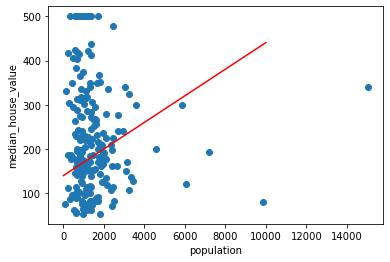

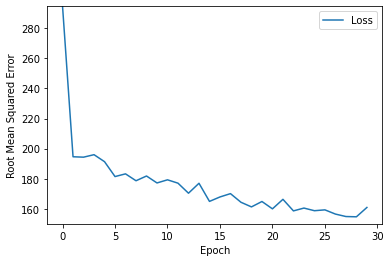

In [13]:
# The following variables are the hyperparameters.
learning_rate = 0.1
epochs = 30
batch_size = 200

# Specify the feature and the label.
my_feature = "population"  # the total population on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model,
                                         training_df, 
                                         my_feature,
                                         my_label,
                                         epochs,
                                         batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/30
85/85 [==============================] - 0s 923us/step - loss: 51640.5664 - root_mean_squared_error: 227.2456
Epoch 2/30
85/85 [==============================] - 0s 2ms/step - loss: 42139.4570 - root_mean_squared_error: 205.2790
Epoch 3/30
85/85 [==============================] - 0s 1ms/step - loss: 34217.7305 - root_mean_squared_error: 184.9803
Epoch 4/30
85/85 [==============================] - 0s 980us/step - loss: 27756.2129 - root_mean_squared_error: 166.6020
Epoch 5/30
85/85 [==============================] - 0s 1ms/step - loss: 22847.3613 - root_mean_squared_error: 151.1534
Epoch 6/30
85/85 [==============================] - 0s 1ms/step - loss: 19361.7578 - root_mean_squared_error: 139.1465
Epoch 7/30
85/85 [==============================] - 0s 2ms/step - loss: 17164.1094 - root_mean_squared_error: 131.0119
Epoch 8/30
85/85 [==============================] - 0s 2ms/step - loss: 15913.9316 - root_mean_squared_error: 126.1504
Epoch 9/30
85/85 [==========================

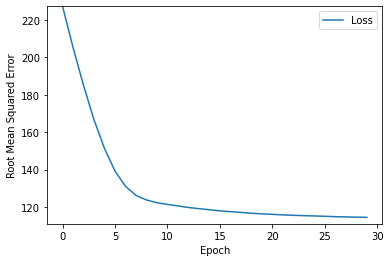

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             200
    2     69             195
    2     62             209
    1     80             188
    2    295             220
    2    500             208
    2    342             218
    4    118             271
    2    128             211
    2    187             219
    3     80             228
    2    112             220
    2     95             215
    2     69             208


In [14]:
# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.1
epochs = 30
batch_size = 200

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model,
                                        training_df,
                                        my_feature,
                                        my_label,
                                        epochs,
                                        batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

In [15]:
corr = training_df.corr()
corr['median_house_value'].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691871
rooms_per_person      0.206969
latitude              0.144917
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
longitude             0.044982
population            0.027850
Name: median_house_value, dtype: float64

Epoch 1/30
85/85 [==============================] - 0s 795us/step - loss: 45245.8789 - root_mean_squared_error: 212.7108
Epoch 2/30
85/85 [==============================] - 0s 845us/step - loss: 30086.6113 - root_mean_squared_error: 173.4549
Epoch 3/30
85/85 [==============================] - 0s 892us/step - loss: 18926.3633 - root_mean_squared_error: 137.5731
Epoch 4/30
85/85 [==============================] - 0s 2ms/step - loss: 11578.0078 - root_mean_squared_error: 107.6012
Epoch 5/30
85/85 [==============================] - 0s 751us/step - loss: 7874.5669 - root_mean_squared_error: 88.7388
Epoch 6/30
85/85 [==============================] - 0s 845us/step - loss: 7027.1860 - root_mean_squared_error: 83.8283
Epoch 7/30
85/85 [==============================] - 0s 774us/step - loss: 7014.4849 - root_mean_squared_error: 83.7525
Epoch 8/30
85/85 [==============================] - 0s 2ms/step - loss: 7015.5366 - root_mean_squared_error: 83.7588
Epoch 9/30
85/85 [==========================

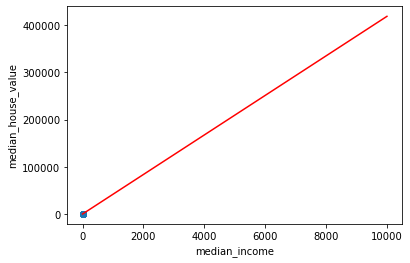

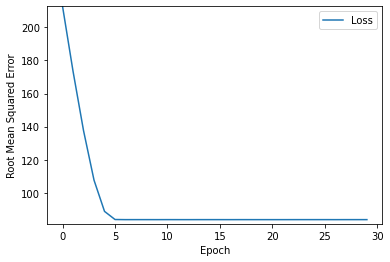

In [16]:
# The following variables are the hyperparameters.
learning_rate = 0.1
epochs = 30
batch_size = 200

# Specify the feature and the label.
my_feature = "median_income"  # the median_income on a specific city block.
my_label = "median_house_value" # the median value of a house on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model,
                                         training_df, 
                                         my_feature,
                                         my_label,
                                         epochs,
                                         batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)